# Simple Linear Regression on Passing Yards and Yards-to-go

# Introduction
A breakthrough many years ago in football data was the creation of the RYOE statistc which attempted to measure RB effiency given a certain down and distance. I wanted to do this same thing, but with passing. I believe that passing, espically in the NFL, is a very hard thing to predict. There are simply way too many variables that are acting upon throwing the footbball.

## Loading Libraries and Data

In [223]:
library(tidyverse)
library(nflfastR)
library(ggthemes)
library(ggrepel)

In [224]:
# load data
pbp <- load_pbp(2023:2024)

## EDA

In [225]:
## filter for passing data
pbp_r_passing <- pbp |>
    filter(play_type == 'pass' & !is.na(passer_player_id)) |>
    mutate(passing_yards = ifelse(
        !is.na(passing_yards), passing_yards, 0
    ))

In [226]:
## filter for NFC North teams
pbp_p_nfc_north <- pbp_r_passing |>
    filter(posteam %in% c('GB', 'MIN', 'CHI', 'DET') |
               defteam %in% c('GB', 'MIN', 'CHI', 'DET'))

In [227]:
## filter for NFC East teams
pbp_p_nfc_east <- pbp_r_passing |>
    filter(posteam %in% c('NYG', 'PHI', 'WAS', 'DAL') |
               defteam %in% c('NYG', 'PHI', 'WAS', 'DAL'))

In [228]:
## scatter plot of passing yards vs yards to go for NFC North teams
passing_plot_nfc_north <- ggplot(pbp_p_nfc_north,
        aes(x = ydstogo, y = passing_yards)) +
        geom_point() +
        theme_bw()

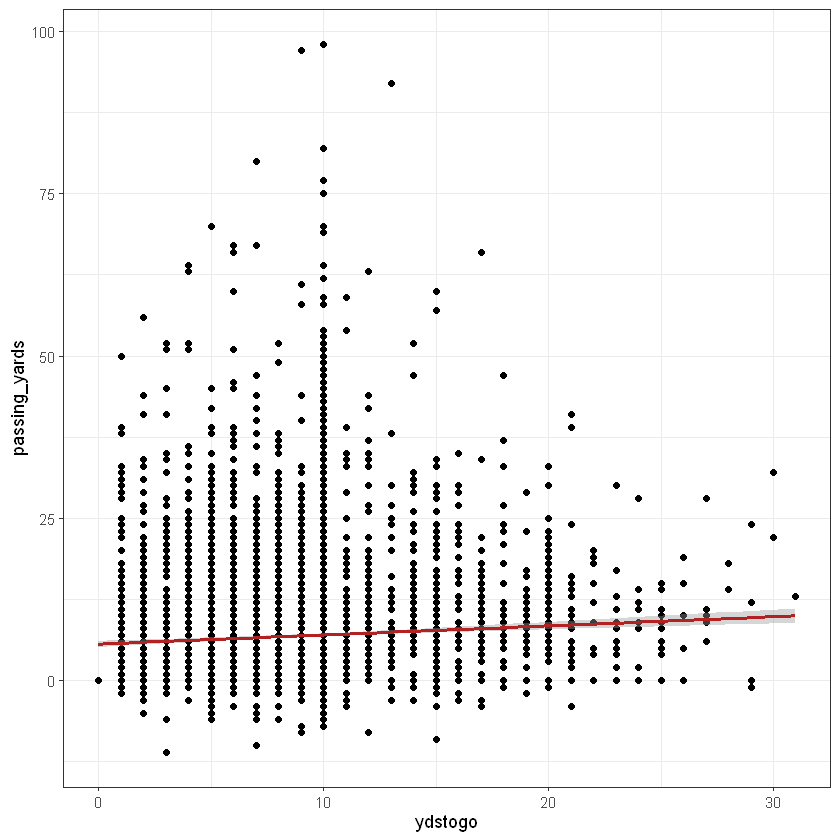

In [229]:
passing_plot_nfc_north +
geom_smooth(method = 'lm', formula = y ~ x, color = 'firebrick')

In [230]:
## scatter plot of passing yards vs yards to go for NFC East teams
passing_plot_nfc_east <- ggplot(pbp_p_nfc_east,
        aes(x = ydstogo, y = passing_yards)) +
        geom_point() +
        theme_bw()

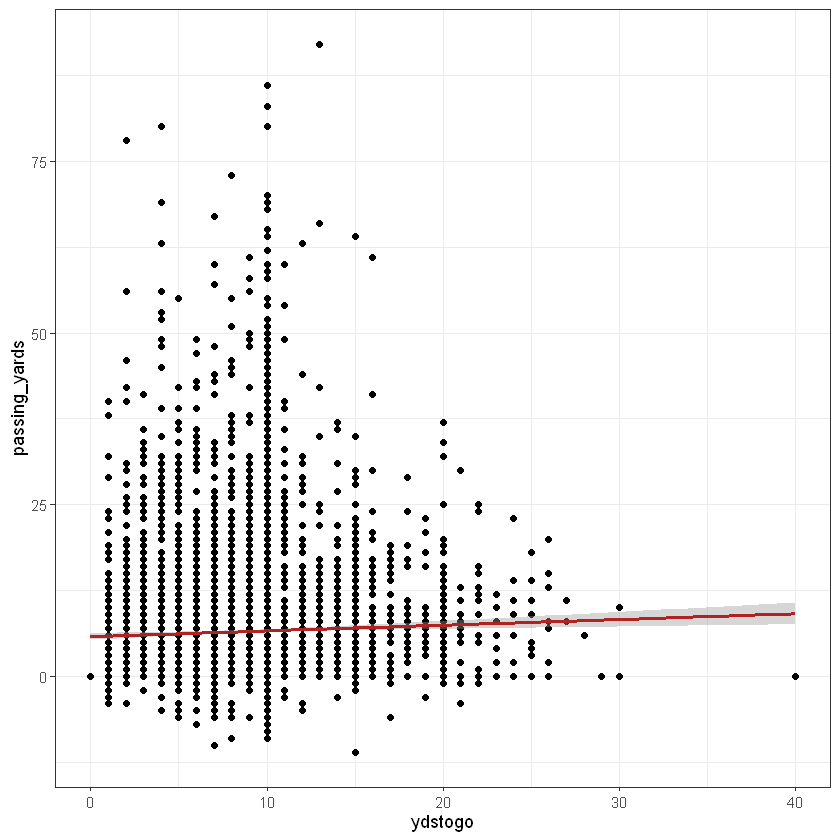

In [231]:
passing_plot_nfc_east +
geom_smooth(method = 'lm', formula = y ~ x, color = 'firebrick')

In [232]:
## Averages for NFC North
pbp_p_nfc_north_averages <- pbp_p_nfc_north |>
    group_by(ydstogo) |>
    summarize(ypp = mean(passing_yards))

## Averages for NFC East
pbp_p_nfc_east_averages <- pbp_p_nfc_east |>
    group_by(ydstogo) |>
    summarize(ypp = mean(passing_yards))

head(pbp_p_nfc_north_averages)
head(pbp_p_nfc_east_averages)

ydstogo,ypp
<dbl>,<dbl>
0,0.000000
1,6.280851
2,5.847403
3,5.536082
4,5.874016
5,6.376953


ydstogo,ypp
<dbl>,<dbl>
0,0.000000
1,5.073276
2,5.932384
3,5.309038
4,6.680693
5,5.955975


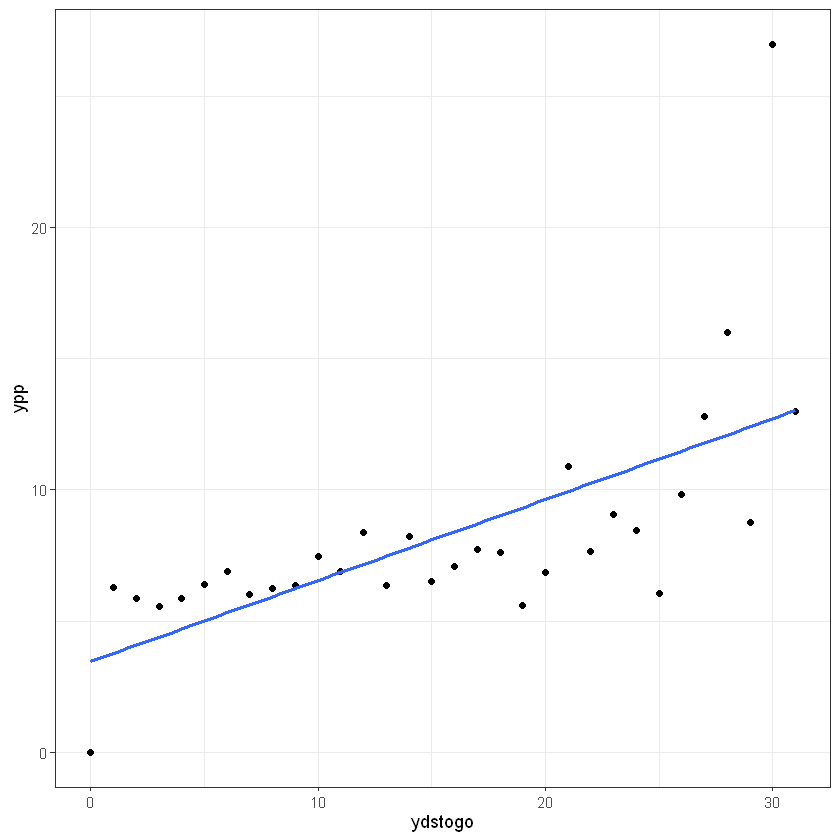

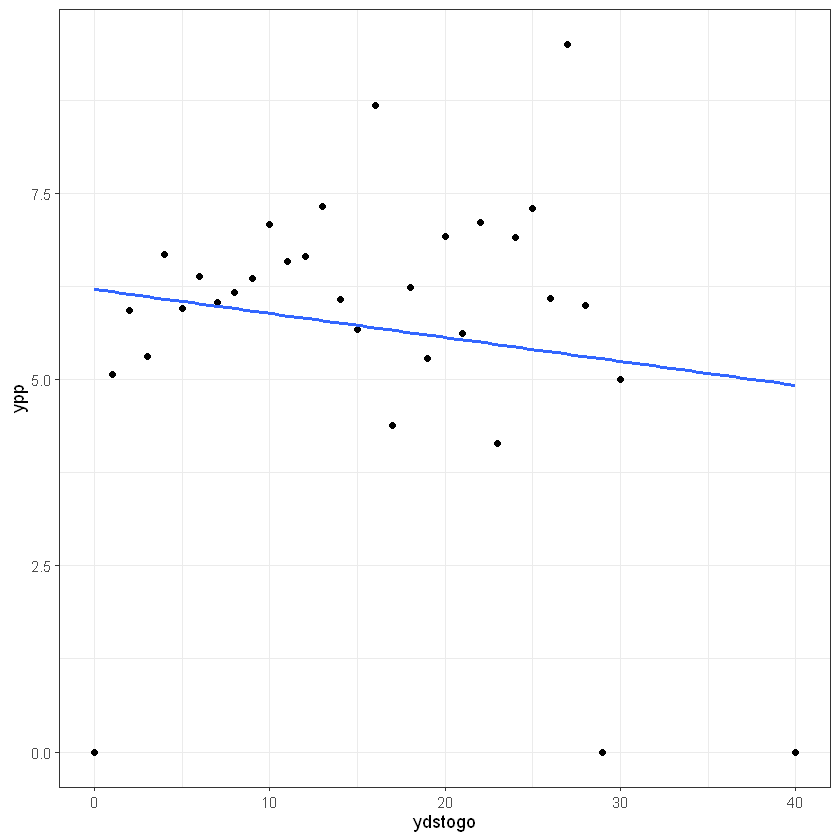

In [233]:
## plot nfc north averages
ggplot(pbp_p_nfc_north_averages, aes(x = ydstogo, y = ypp)) +
    geom_point() +
    theme_bw() +
    stat_smooth(method = 'lm', se = FALSE, formula = y ~ x)

## plot nfc east averages
ggplot(pbp_p_nfc_east_averages, aes(x = ydstogo, y = ypp)) +
    geom_point() +
    theme_bw() +
    stat_smooth(method = 'lm', se = FALSE, formula = y ~ x)

## Modeling the Data

In [234]:
## Create fitted model objects
model_nfc_north <- lm(passing_yards ~ 1 + ydstogo, data = pbp_p_nfc_north)
model_nfc_east <- lm(passing_yards ~ 1 + ydstogo, data = pbp_p_nfc_east)

In [235]:
## Model Summaries
summary(model_nfc_north)
summary(model_nfc_east)


Call:
lm(formula = passing_yards ~ 1 + ydstogo, data = pbp_p_nfc_north)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.046  -6.748  -3.029   3.393  90.971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.62430    0.24362  23.086  < 2e-16 ***
ydstogo      0.14045    0.02512   5.591 2.32e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.561 on 8676 degrees of freedom
Multiple R-squared:  0.00359,	Adjusted R-squared:  0.003475 
F-statistic: 31.26 on 1 and 8676 DF,  p-value: 2.325e-08



Call:
lm(formula = passing_yards ~ 1 + ydstogo, data = pbp_p_nfc_east)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.046  -6.547  -2.881   3.203  85.120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.79976    0.24649  23.530  < 2e-16 ***
ydstogo      0.08307    0.02542   3.269  0.00109 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.436 on 8556 degrees of freedom
Multiple R-squared:  0.001247,	Adjusted R-squared:  0.00113 
F-statistic: 10.68 on 1 and 8556 DF,  p-value: 0.001085


In [236]:
## Add residuals to dataframes
pbp_p_nfc_north <- pbp_p_nfc_north |>
    mutate(pyoe = resid(model_nfc_north))

pbp_p_nfc_east <- pbp_p_nfc_east |>
    mutate(pyoe = resid(model_nfc_east))

head(pbp_p_nfc_north$pyoe)
head(pbp_p_nfc_east$pyoe)

1         2         3         4         5         6 
-6.045665 -6.045665  4.094789 -2.028844 -6.326573 -6.607482

1         2         3         4         5         6 
-0.381286 -6.630510  5.369490 -5.630510 -6.547436 -4.547436

In [237]:
nfc_north_pyoe <- pbp_p_nfc_north |>
    group_by(season, passer_player_id, passer_player_name) |>
    summarize(
        attempts = n(),
        total_passing_yards = sum(passing_yards),
        ypa = mean(passing_yards),
        pyoe_total = sum(pyoe),
        pyoe_per = mean(pyoe)
    ) |>
    filter(attempts >= 200) |>
    arrange(desc(pyoe_total))

nfc_east_pyoe <- pbp_p_nfc_east |>
    group_by(season, passer_player_id, passer_player_name) |>
    summarize(
        attempts = n(),
        total_passing_yards = sum(passing_yards),
        ypa = mean(passing_yards),
        pyoe_total = sum(pyoe),
        pyoe_per = mean(pyoe)
    ) |>
    filter(attempts >= 200) |>
    arrange(desc(pyoe_total))

head(nfc_north_pyoe)
head(nfc_east_pyoe)

`summarise()` has grouped output by 'season', 'passer_player_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'season', 'passer_player_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'season', 'passer_player_id'. You can
override using the `.groups` argument.


season,passer_player_id,passer_player_name,attempts,total_passing_yards,ypa,pyoe_total,pyoe_per
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2024,00-0033106,J.Goff,607,4942,8.141680,807.37817,1.3301123
2024,00-0036264,J.Love,477,3601,7.549266,333.77802,0.6997443
2023,00-0033106,J.Goff,754,5412,7.177719,267.17259,0.3543403
2024,00-0034869,S.Darnold,643,4564,7.097978,144.31625,0.2244421
2023,00-0029604,K.Cousins,326,2331,7.150307,107.15532,0.3286973
2023,00-0036264,J.Love,665,4625,6.954887,86.91885,0.1307050


season,passer_player_id,passer_player_name,attempts,total_passing_yards,ypa,pyoe_total,pyoe_per
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2023,00-0033077,D.Prescott,695,4919,7.077698,405.16826,0.58297591
2024,00-0036389,J.Hurts,503,3629,7.214712,340.12594,0.67619470
2024,00-0039910,J.Daniels,648,4390,6.774691,166.95047,0.25763961
2023,00-0036389,J.Hurts,613,4108,6.701468,93.59123,0.15267738
2024,00-0033077,D.Prescott,307,1978,6.442997,-28.82281,-0.09388538
2024,00-0033662,C.Rush,321,1844,5.744548,-252.99156,-0.78813571


In [238]:
nfc_north_pyoe |>
    arrange(-pyoe_per)

nfc_east_pyoe |>
    arrange(-pyoe_per)


season,passer_player_id,passer_player_name,attempts,total_passing_yards,ypa,pyoe_total,pyoe_per
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2024,00-0033106,J.Goff,607,4942,8.141680,807.37817,1.3301123
2024,00-0036264,J.Love,477,3601,7.549266,333.77802,0.6997443
2023,00-0033106,J.Goff,754,5412,7.177719,267.17259,0.3543403
2023,00-0029604,K.Cousins,326,2331,7.150307,107.15532,0.3286973
2024,00-0034869,S.Darnold,643,4564,7.097978,144.31625,0.2244421
2023,00-0036264,J.Love,665,4625,6.954887,86.91885,0.1307050
2023,00-0036945,J.Fields,416,2562,6.158654,-312.98057,-0.7523571
2024,00-0039918,C.Williams,636,3541,5.567610,-839.03272,-1.3192338


season,passer_player_id,passer_player_name,attempts,total_passing_yards,ypa,pyoe_total,pyoe_per
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2024,00-0036389,J.Hurts,503,3629,7.214712,340.12594,0.67619470
2023,00-0033077,D.Prescott,695,4919,7.077698,405.16826,0.58297591
2024,00-0039910,J.Daniels,648,4390,6.774691,166.95047,0.25763961
2023,00-0036389,J.Hurts,613,4108,6.701468,93.59123,0.15267738
2024,00-0033077,D.Prescott,307,1978,6.442997,-28.82281,-0.09388538
2023,00-0037077,S.Howell,679,3946,5.811487,-483.25996,-0.71172306
2024,00-0033662,C.Rush,321,1844,5.744548,-252.99156,-0.78813571
2024,00-0035710,D.Jones,371,2070,5.579515,-353.53259,-0.95291804
2023,00-0038476,T.DeVito,215,1101,5.120930,-324.06129,-1.50726181


In [239]:
## Create current dataframes
nfc_north_pyoe_now <- nfc_north_pyoe |>
    select(-attempts, -pyoe_total)

nfc_east_pyoe_now <- nfc_east_pyoe |>
    select(-attempts, -pyoe_total)

In [240]:
## Create lag data
nfc_north_pyoe_last <- nfc_north_pyoe |>
    select(-attempts, -pyoe_total) |>
    mutate(season = season + 1) |>
    rename(pyoe_per_last = pyoe_per,
           ypa_last = ypa)

nfc_east_pyoe_last <- nfc_east_pyoe |>
    select(-attempts, -pyoe_total) |>
    mutate(season = season + 1) |>
    rename(pyoe_per_last = pyoe_per,
           ypa_last = ypa)

In [241]:
## Merge data
nfc_north_pyoe_lag <- nfc_north_pyoe_now |>
    inner_join(nfc_north_pyoe_last,
               by = c('passer_player_id', 'passer_player_name', 'season')) |>
               ungroup()

nfc_east_pyoe_lag <- nfc_east_pyoe_now |>
    inner_join(nfc_east_pyoe_last,
               by = c('passer_player_id', 'passer_player_name', 'season')) |>
               ungroup()

In [242]:
head(nfc_north_pyoe_lag)
head(nfc_east_pyoe_lag)

season,passer_player_id,passer_player_name,total_passing_yards.x,ypa,pyoe_per,total_passing_yards.y,ypa_last,pyoe_per_last
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024,00-0033106,J.Goff,4942,8.141680,1.3301123,5412,7.177719,0.3543403
2024,00-0036264,J.Love,3601,7.549266,0.6997443,4625,6.954887,0.1307050


season,passer_player_id,passer_player_name,total_passing_yards.x,ypa,pyoe_per,total_passing_yards.y,ypa_last,pyoe_per_last
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024,00-0036389,J.Hurts,3629,7.214712,0.67619470,4108,6.701468,0.1526774
2024,00-0033077,D.Prescott,1978,6.442997,-0.09388538,4919,7.077698,0.5829759


In [243]:
## ypa vs ypa last
nfc_north_pyoe_lag |>
    select(ypa, ypa_last) |>
    cor(use = "complete.obs")

nfc_east_pyoe_lag |>
    select(ypa, ypa_last) |>
    cor(use = "complete.obs")

,ypa,ypa_last
ypa,1,1
ypa_last,1,1


,ypa,ypa_last
ypa,1,-1
ypa_last,-1,1


In [244]:
## PYOE vs PYOE last
nfc_north_pyoe_lag |>
    select(pyoe_per, pyoe_per_last) |>
    cor(use = "complete.obs")

nfc_east_pyoe_lag |>
    select(pyoe_per, pyoe_per_last) |>
    cor(use = "complete.obs")

,pyoe_per,pyoe_per_last
pyoe_per,1,1
pyoe_per_last,1,1


,pyoe_per,pyoe_per_last
pyoe_per,1,-1
pyoe_per_last,-1,1


## Results

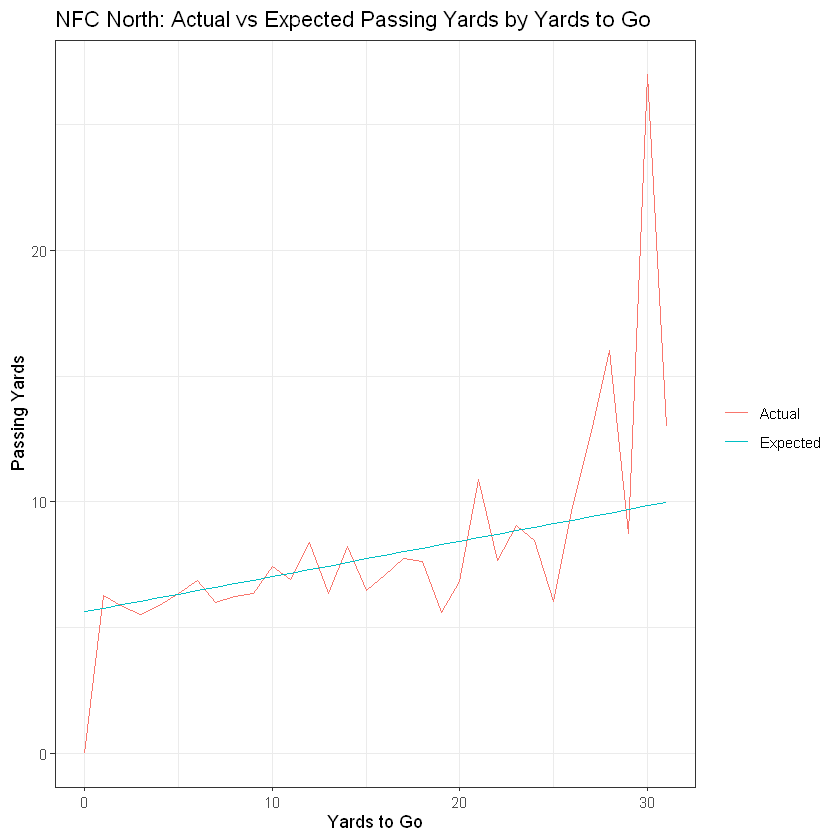

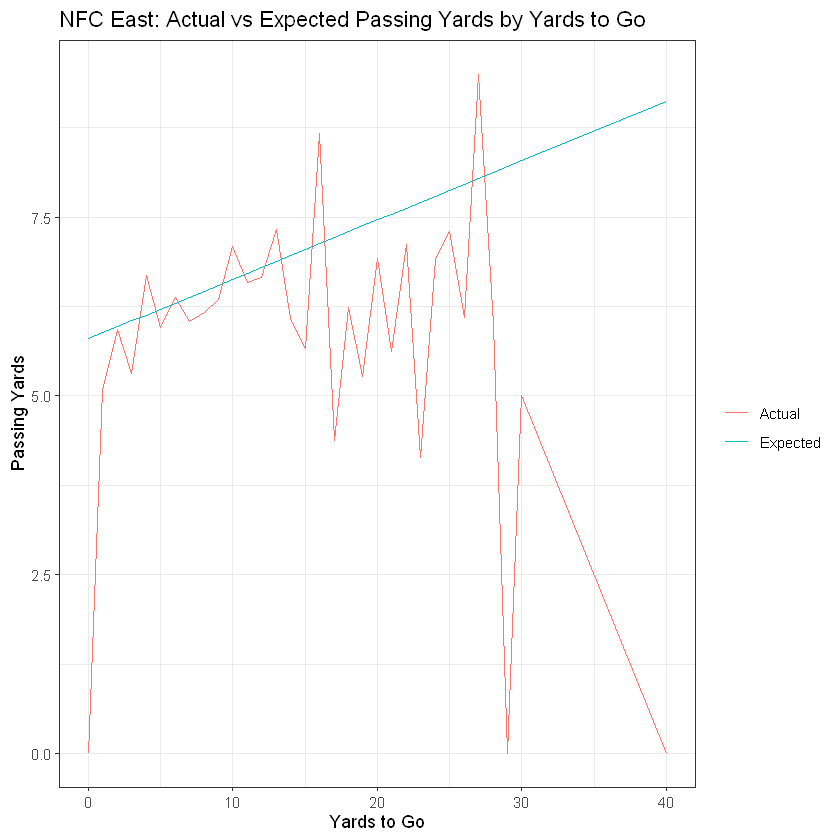

In [246]:
## Chart: Actual vs Expected Passing Yards by Yards to Go (NFC North)
nfc_north_y2g <- pbp_p_nfc_north |>
    group_by(ydstogo) |>
    summarize(actual = mean(passing_yards, na.rm = TRUE),
              expected = mean(passing_yards - pyoe, na.rm = TRUE))

ggplot(nfc_north_y2g, aes(x = ydstogo)) +
    geom_line(aes(y = actual, color = 'Actual')) +
    geom_line(aes(y = expected, color = 'Expected')) +
    labs(title = 'NFC North: Actual vs Expected Passing Yards by Yards to Go',
         x = 'Yards to Go',
         y = 'Passing Yards',
         color = '') +
    theme_bw()
    
## Chart: Actual vs Expected Passing Yards by Yards to Go (NFC East)
nfc_east_y2g <- pbp_p_nfc_east |>
    group_by(ydstogo) |>
    summarize(actual = mean(passing_yards, na.rm = TRUE),
              expected = mean(passing_yards - pyoe, na.rm = TRUE))
ggplot(nfc_east_y2g, aes(x = ydstogo)) +
    geom_line(aes(y = actual, color = 'Actual')) +
    geom_line(aes(y = expected, color = 'Expected')) +
    labs(title = 'NFC East: Actual vs Expected Passing Yards by Yards to Go',
         x = 'Yards to Go',
         y = 'Passing Yards',
         color = '') +
    theme_bw()

# Conclusion
As I expected, no pun intended, passing yards can vary because of so many existential factors that play into throwing the football. Unfortunately, the game of football would be so much more easier to manage if we could scheme passing against a certain down and distance, but that's not very realistic. I think what this also shows is that while having a higher PYOE does tend to lead to throwing more passing yards, it's mostly all subjective. A better solution to this problem would be using some sort of unsupervised machine learning method, that can better identify patterns and consistencies within passing data.